# Exercise Round 4

In [1]:
import matplotlib.pyplot as plt
import numpy as np

The corresponding weighted least squares problem would be
$$J(\mathbf{x}) = \sum_{n=1}^N (\mathbf{y}_n - \mathbf{g}(\mathbf{x}))^\top \mathbf{R}^{-1} (\mathbf{y}_n - \mathbf{g}(\mathbf{x}))$$

## The measurement model and Jacobian

In [6]:
def g(x):
    return np.array([np.sin(x[0] + x[1]) + x[1], 1 - x[0]])

def J(x): # Note that this is the Jacobian, not the cost function!
    return np.array([[np.cos(x[0] + x[1]), np.cos(x[0] + x[1]) + 1],
                     [-1,0]])

x = np.array([1.0,2.0])
J(x)

array([[-0.9899925,  0.0100075],
       [-1.       ,  0.       ]])

## Simulate data (only one data point, i.e. $N=1$)

In [7]:
sigma = 0.1
R = np.diag([sigma**2,sigma**2])
Ri = np.linalg.inv(R)
np.random.seed(2)
y = g(x) + np.random.normal(0,sigma,2)
print(y)

[ 2.09944422 -0.00562668]


## The cost function J(x)

In [8]:
def cost(x):
    return (y - g(x)).T @ np.linalg.inv(R) @ (y - g(x))


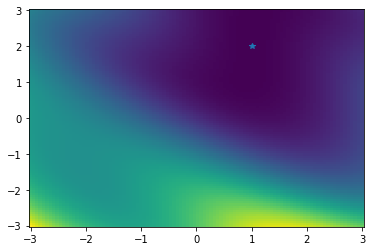

In [9]:
def plot_cost():
    x0s = np.linspace(-3,3,100)
    x1s = np.linspace(-3,3,100)
    gridx0, gridx1 = np.meshgrid(x0s,x1s)
    z = np.zeros(gridx0.shape)
    for i in range(gridx0.shape[0]):
        for j in range(gridx0.shape[1]):
            cx = np.array([gridx0[i,j],gridx1[i,j]])
            z[i,j] = cost(cx)
    plt.pcolor(x0s,x1s,z,shading='auto')

plt.clf()
plot_cost()
plt.plot(x[0],x[1],'*')


## Gauss-Newton

In [16]:
x_est = np.array([2.3,0.7])
N = 10
x0_path = np.zeros(N+1)
x1_path = np.zeros(N+1)
x0_path[0] = x_est[0]
x1_path[0] = x_est[1]
for i in range(N):
    Gv = J(x_est)
    dx = np.linalg.solve(Gv.T @ Ri @ Gv, Gv.T @ Ri @ (y - g(x_est)))
    x_est = x_est + dx
    x0_path[i+1] = x_est[0]
    x1_path[i+1] = x_est[1]
    print(x_est)

[ 1.00562668 -1.607834  ]
[1.00562668 0.73511373]
[1.00562668 1.19094317]
[1.00562668 1.42747838]
[1.00562668 1.51590344]
[1.00562668 1.52908973]
[1.00562668 1.5293709 ]
[1.00562668 1.52937102]
[1.00562668 1.52937102]
[1.00562668 1.52937102]


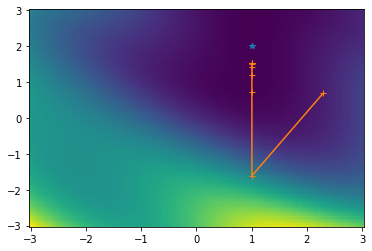

In [17]:
plt.clf()
plot_cost()
plt.plot(x[0],x[1],'*')
plt.plot(x0_path,x1_path,'+-')


## With automatic differentiation

In [21]:
import autograd.numpy as np   # Thinly-wrapped version of Numpy # install it: pip install autograd
from autograd import jacobian

In [22]:
def g_ag(x):
    return np.array([np.sin(x[0] + x[1]) + x[1], 1 - x[0]])

J_ag = jacobian(g_ag)
J_ag(x)

array([[-0.9899925,  0.0100075],
       [-1.       ,  0.       ]])

In [23]:
x_est = np.array([2.3,0.7])
Ri = np.linalg.inv(R)
for i in range(N):
    Gv = J_ag(x_est)
    dx = np.linalg.solve(Gv.T @ Ri @ Gv, Gv.T @ Ri @ (y - g_ag(x_est)))
    x_est = x_est + dx
    print(x_est)

[ 1.00562668 -1.607834  ]
[1.00562668 0.73511373]
[1.00562668 1.19094317]
[1.00562668 1.42747838]
[1.00562668 1.51590344]
[1.00562668 1.52908973]
[1.00562668 1.5293709 ]
[1.00562668 1.52937102]
[1.00562668 1.52937102]
[1.00562668 1.52937102]
